In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

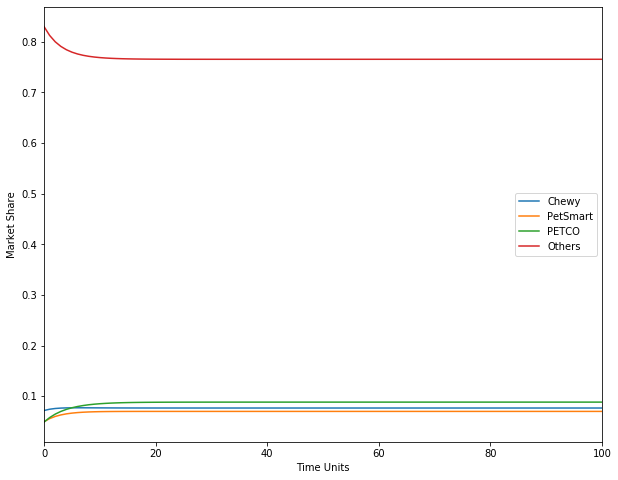

,Chewy,PetSmart,PETCO,Others
0,0.071589,0.049600,0.048801,0.830010
1,0.074126,0.055601,0.057616,0.812658
2,0.075563,0.059845,0.064442,0.800151
3,0.076342,0.062842,0.069732,0.791086
4,0.076734,0.064954,0.073835,0.784480
...,...,...,...,...
96,0.076502,0.069806,0.088160,0.765606
97,0.076502,0.069806,0.088160,0.765607
98,0.076502,0.069806,0.088160,0.765607
99,0.076502,0.069806,0.088160,0.765608


In [37]:
#Market share forecasting with Markov chain
firms = ["Chewy", "PetSmart", "PETCO", "Others"]
market_share = np.array([[0.071589, 0.0496, 0.048801, 0.83001]])
share_history = market_share
transition = np.array([[0.67, 0.01763, 0.017346, 0.295024],
                       [0.019321, 0.743494, 0.013171, 0.224014],
                       [0.015052, 0.010429, 0.8, 0.174519],
                       [0.02948, 0.020425, 0.020096, 0.93]])

for i in range(100):
    market_share = np.dot(market_share, transition)
    share_history = np.append(share_history, market_share, axis=0)

dfMarketDistribution = pd.DataFrame(share_history)
dfMarketDistribution.columns = firms
dfMarketDistribution.plot(figsize = (10, 8))
plt.ylabel("Market Share")
plt.xlabel("Time Units")
plt.show()
dfMarketDistribution


In [82]:
#Pet Spending Market forecasting with linear regression
gdp = np.array([7287, 7640, 8073, 8578, 9063, 
                9631, 10252, 10582, 10936, 11458, 
                12214, 13037, 13815, 14452, 14713, 
                14449, 14992, 15543, 16197, 16785, 
                17527, 18238, 18745, 19543]).reshape((-1, 1))
pet_spending = np.array([17, 19, 21, 22, 23, 
                         24.83, 26.66, 28.5, 29.6, 32.4, 
                         34.4, 36.3, 38.5, 41.2, 43.2, 
                         45.53, 48.35, 50.96, 53.33, 55.72, 
                         58.04, 60.28, 66.75, 69.51])
gdp18_21 = np.array([20612, 21433, 20933, 22675]).reshape((-1, 1))
gdp_forecast = np.array([24004, 24893, 25790, 26720, 27659]).reshape((-1, 1))
pet_spending18_21 = [90.5, 97.1, 103.6, 109.6]

spending_model = LinearRegression().fit(gdp, pet_spending)
print("Pet Spending = {}*GDP + {}".format(spending_model.coef_[0], spending_model.intercept_))

Pet Spending = 0.004178584748529153*GDP + -15.207123535459239


In [73]:
unadjusted = spending_model.predict(gdp18_21).tolist()
unadjusted
difference = []
for i, val in enumerate(unadjusted):
    difference.append(pet_spending18_21[i] - val)
avg_dif = sum(difference) / 4
print("Average difference: ${} bil".format(avg_dif))

Average difference: $25.93004366901736 bil


In [74]:
long_term = spending_model.predict(gdp_forecast).tolist()
long_term = [i + avg_dif for i in long_term]
print("2022 Market Size: ${} bil".format(long_term[0]))
print("2026 Market Size: ${} bil".format(long_term[3]))

2022 Market Size: $111.02566843725188 bil
2026 Market Size: $122.37470461425707 bil


In [66]:
chwy_market_share = dfMarketDistribution.iloc[100][0]
print("CHWY 2021 Revenue Forecast: ${} bil".format(chwy_market_share * 109.6))
for i, val in enumerate(long_term):
    print("CHWY {} Revenue Forecast: ${} bil".format(2022 + i, chwy_market_share * val))

CHWY 2021 Revenue Forecast: $8.384659919132647 bil
CHWY 2022 Revenue Forecast: $8.493726935590661 bil
CHWY 2023 Revenue Forecast: $8.777915026111334 bil
CHWY 2024 Revenue Forecast: $9.064660489775049 bil
CHWY 2025 Revenue Forecast: $9.361955117653817 bil
CHWY 2026 Revenue Forecast: $9.662126790318508 bil


In [83]:
#Share-based compensation expense multivariate regression
inputs = {"Net Income": [-29.55, -82.88, -79, -60.94, -47.87, -32.82, -32.85, 25.09, 38.72],
         "CHWY Price": [34.99, 31.7, 24.15, 26.67, 42, 53.75, 62.13, 102.36, 80.23],
         "Share-based Compensation Expense": [7.23, 43.78, 39.35, 45.88, 42.34, 37.8, 25.09, 23.98, 24.77]}
dfInput = pd.DataFrame(inputs)

share_model = LinearRegression().fit(dfInput[["Net Income", "CHWY Price"]], dfInput["Share-based Compensation Expense"])
print("Share-based Compensation Expense = {}*Net Income + {}*CHWY Price + {}".format(share_model.coef_[0], share_model.coef_[1], share_model.intercept_))

Share-based Compensation Expense = -0.3377595335017814*Net Income + 0.2784049258792055*CHWY Price + 6.742106330550367


In [95]:
future_share_price = []
price = 75.3
for i in range(6):
    price = price * 1.1
    future_share_price.append(price)
    
future_inputs = {"Net Income": [347.7, 548.12, 808.93, 991.34, 1183.07, 1381.75],
         "CHWY Price": future_share_price}

dfFuture = pd.DataFrame(future_inputs)
compensation = share_model.predict(dfFuture[["Net Income", "CHWY Price"]]).tolist()
for i, val in enumerate(compensation):
    print("CHWY {} Share-based compensation Forecast: ${} mil".format(2021 + i, val))

CHWY 2021 Share-based compensation Forecast: $-87.63660345744442 mil
CHWY 2022 Share-based compensation Forecast: $-153.024341160814 mil
CHWY 2023 Share-based compensation Forecast: $-238.57877429225036 mil
CHWY 2024 Share-based compensation Forecast: $-297.39919691703085 mil
CHWY 2025 Share-based compensation Forecast: $-359.08850900591983 mil
CHWY 2026 Share-based compensation Forecast: $-422.81831752570554 mil
